<a href="https://colab.research.google.com/github/xcellentbird/STUDY/blob/main/AI/3%EB%B6%84%EB%94%A5%EB%9F%AC%EB%8B%9D%20PyTorch/3%EB%B6%84_torch_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [3]:
EPOCH = 10
BATCH_SIZE = 64
IS_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if IS_CUDA else "cpu")
print("Using Device: ",DEVICE)

Using Device:  cuda


In [4]:
trainset = datasets.FashionMNIST(
    root        = './.data/',
    train       = True,
    download    = True,
    transform  = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset    = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
    num_workers = 2
)


Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [1]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12, 3),
    )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid(),
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded
  
Autoencoder()

NameError: ignored

In [ ]:
autoencoder = Autoencoder().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)
criterion = nn.MSELoss()

view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255.

In [21]:
def train(autoencoder, train_loader):
  autoencoder.train()
  for step, (x, label) in enumerate(train_loader):
    x = x.view(-1, 28*28).to(DEVICE)
    y = x.view(-1, 28*28).to(DEVICE)
    label = label.to(DEVICE)

    encoded, decoded = autoencoder(x)

    loss = criterion(decoded, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.Size([5, 784])
[Epoch 1]


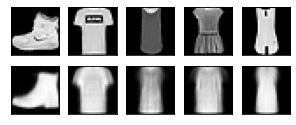

encoded data: tensor([[-5.1232,  2.8139, -2.8282],
        [ 7.2950, -4.5471, -2.4986],
        [ 3.3378, -0.8786,  0.8822],
        [ 4.5687, -3.3184,  0.0909],
        [ 7.4269, -1.7053,  1.7856]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 2]


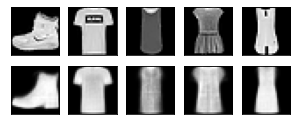

encoded data: tensor([[-5.1787,  2.6546, -2.9351],
        [ 8.0348, -4.5081, -2.7580],
        [ 3.4465,  1.6812,  0.1499],
        [ 4.8614, -3.8513,  0.8994],
        [ 6.0658,  8.5037,  0.1327]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 3]


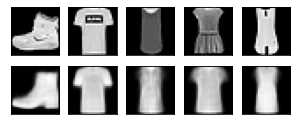

encoded data: tensor([[-4.6711,  3.1764, -2.2695],
        [ 8.2470, -2.0035, -3.9638],
        [ 3.6775, -1.6643,  0.9328],
        [ 5.1040, -3.3038, -0.3514],
        [ 8.0978, -2.5448,  1.6220]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 4]


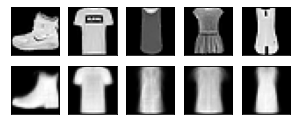

encoded data: tensor([[-4.1594,  2.7439, -3.1808],
        [ 8.9230, -2.2161, -3.9780],
        [ 3.8742, -1.3062,  0.8174],
        [ 5.3172, -3.1639, -0.4477],
        [ 8.6043, -1.6801,  1.5685]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 5]


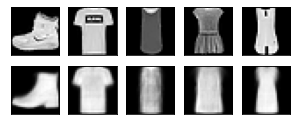

encoded data: tensor([[-3.9932,  2.6274, -2.4559],
        [ 8.4478, -2.6104, -4.0224],
        [ 3.7629,  1.0498,  0.3146],
        [ 5.0152, -4.2071,  0.1431],
        [ 8.4982,  2.8317,  0.6164]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 6]


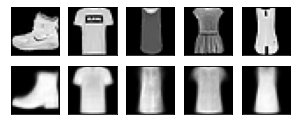

encoded data: tensor([[-4.4810,  2.7416, -2.9359],
        [ 8.7973, -2.6434, -4.5757],
        [ 3.7612, -1.6023,  0.9570],
        [ 5.3790, -2.6924, -0.5533],
        [ 8.3782, -2.3400,  1.6454]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 7]


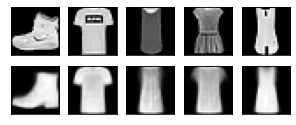

encoded data: tensor([[-4.1974,  2.4969, -2.4693],
        [ 9.2071, -2.1604, -4.4028],
        [ 3.9195, -0.9267,  0.8525],
        [ 5.5100, -2.3175, -0.4243],
        [ 8.6447, -1.8160,  2.2286]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 8]


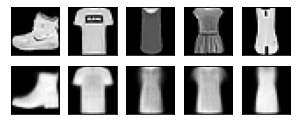

encoded data: tensor([[-4.1466,  1.7879, -2.9494],
        [ 9.7419, -1.9944, -5.1032],
        [ 4.2563, -0.7849,  0.6707],
        [ 5.7282, -2.5185, -0.5014],
        [ 9.3409, -1.7412,  1.8393]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 9]


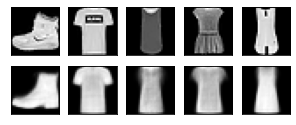

encoded data: tensor([[-3.8875,  1.8542, -3.0378],
        [ 9.4339, -1.5986, -4.7886],
        [ 4.2241, -0.6759,  0.8154],
        [ 5.6523, -2.3152, -0.3587],
        [ 9.0843, -1.9057,  2.2232]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([5, 784])
[Epoch 10]


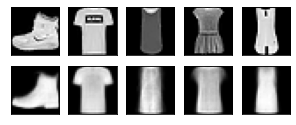

encoded data: tensor([[-4.1904,  1.7322, -3.4126],
        [ 9.5212, -1.3623, -4.8550],
        [ 4.1801, -1.0105,  1.2775],
        [ 5.7505, -1.7725, -0.1061],
        [ 9.2743, -2.0257,  2.8676]], device='cuda:0', grad_fn=<AddmmBackward>)


In [29]:
for epoch in range(1, EPOCH+1):
  train(autoencoder, train_loader)

  test_x = view_data.to(DEVICE)
  encoded_data, decoded_data = autoencoder(test_x)
  print(decoded_data.shape)
  f, a = plt.subplots(2, 5, figsize=(5,2))
  print("[Epoch {}]".format(epoch))
  for i in range(5):
    img = np.reshape(view_data.data.numpy()[i], (28, 28))
    a[0][i].imshow(img, cmap='gray')
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

  for i in range(5):
    img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
    a[1][i].imshow(img, cmap="gray")
    a[1][i].set_xticks(()); a[1][i].set_yticks(())

  plt.show()

  print('encoded data:', encoded_data)